In [94]:
import contextlib
import os
import time
from IPython.display import Audio
import pyaudio
import wave
from windows_volume_controller import MasterVolumeController
import pickle
from pydub import AudioSegment
from pydub.playback import play

VOLUME_INFO_FILENAME = "volume_info.dat"
INITIAL_RECORDING_FILENAME = "initial.wav"
PLAYBACK_RECORDING_FILENAME = "playback.wav"
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
SAMPLE_RATE = 48000
RECORD_SECONDS = 10

volume_controller = MasterVolumeController()

with contextlib.suppress(OSError):
    os.remove(VOLUME_INFO_FILENAME)

In [95]:
def record_audio(filename):
    # initialize PyAudio object
    p = pyaudio.PyAudio()
    # open stream object as input & output
    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=SAMPLE_RATE,
                    input=True,
                    output=True,
                    frames_per_buffer=CHUNK)
    frames = []
    print(f"Recording for {RECORD_SECONDS} seconds...")
    for _ in range(int(SAMPLE_RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        # if you want to hear your voice while recording
        # stream.write(data)
        frames.append(data)
    print("Finished recording.")
    # stop and close stream
    stream.stop_stream()
    stream.close()
    # terminate pyaudio object
    p.terminate()
    # save audio file
    # open the file in 'write bytes' mode
    print(f"Saving to audio file '{filename}'...")
    wf = wave.open(filename, "wb")
    # set the channels
    wf.setnchannels(CHANNELS)
    # set the sample format
    wf.setsampwidth(p.get_sample_size(FORMAT))
    # set the sample rate
    wf.setframerate(SAMPLE_RATE)
    # write the frames as bytes
    wf.writeframes(b"".join(frames))
    print("Done")
    # close the file
    wf.close()

def play_audio(filename, vol):
    playback_audio = AudioSegment.from_file(filename)
    print(f"Playing on current volume of {volume_controller.get_volume() * 100}")
    play(playback_audio)
    print("Done")
    time.sleep(2)
    print(f"Resetting the volume to {vol}")
    volume_controller.set_volume(vol / 100)
    print("Playing...")
    play(playback_audio)
    print("Done")


In [96]:
# Record & Save Audio and Volume
record_audio(INITIAL_RECORDING_FILENAME)
Audio(INITIAL_RECORDING_FILENAME)

Recording for 10 seconds...
Finished recording.
Saving to audio file 'initial.wav'...
Done


In [97]:
record_audio(PLAYBACK_RECORDING_FILENAME)
Audio(PLAYBACK_RECORDING_FILENAME)

Recording for 10 seconds...
Finished recording.
Saving to audio file 'playback.wav'...
Done


In [98]:
initial_DB = AudioSegment.from_file(INITIAL_RECORDING_FILENAME).dBFS
playback_DB = AudioSegment.from_file(PLAYBACK_RECORDING_FILENAME).dBFS
print(initial_DB)
print(playback_DB)

-39.6539111193444
-33.13825474780157


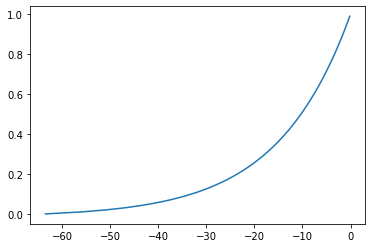

In [99]:
x = [i / 100 for i in range(100)]
y = []
for i in x:
    volume_controller.set_volume(i)
    y.append(volume_controller.get_volume_db())

import matplotlib.pyplot as plt
plt.plot(y, x)

In [76]:
volume_controller.set_volume_db(initial_DB)

In [100]:
y

[-63.5,
 -55.96141052246094,
 -50.94487380981445,
 -47.179508209228516,
 -44.164154052734375,
 -41.64909362792969,
 -39.491695404052734,
 -37.602787017822266,
 -35.92287826538086,
 -34.4102897644043,
 -33.034690856933594,
 -31.7733154296875,
 -30.608640670776367,
 -29.526887893676758,
 -28.517032623291016,
 -27.57010841369629,
 -26.67873191833496,
 -25.836742401123047,
 -25.038957595825195,
 -24.280963897705078,
 -23.558979034423828,
 -22.869739532470703,
 -22.21040153503418,
 -21.57847785949707,
 -20.97178077697754,
 -20.388370513916016,
 -19.82653045654297,
 -19.28471565246582,
 -18.761552810668945,
 -18.25579833984375,
 -17.76633071899414,
 -17.29213523864746,
 -16.832286834716797,
 -16.385940551757812,
 -15.9523286819458,
 -15.530744552612305,
 -15.120537757873535,
 -14.721111297607422,
 -14.33191204071045,
 -13.952430725097656,
 -13.582191467285156,
 -13.220757484436035,
 -12.867718696594238,
 -12.522692680358887,
 -12.185325622558594,
 -11.855283737182617,
 -11.532255172729492,
 

In [101]:
upper_vol_db = y[len (y)-1]
lower_vol_db = y[0]
target_db = initial_DB
corresponding_vol_db = y
corresponding_steps = len(corresponding_vol_db)
step_size = (upper_vol_db - lower_vol_db) / (corresponding_steps - 1)
target_range_vol_db = [lower_vol_db]

for i in range(2, corresponding_steps + 1):
    corresponding_vol = lower_vol_db + step_size * (i - 1)
    target_range_vol_db.append(corresponding_vol)

x2 = []
y2 = []
for e, i in enumerate(target_range_vol_db):
    x2.append(i)
    y2.append(e)
    print(e, i)

curr_db = 0
prev_db = target_range_vol_db[0]
target_vol = 0
for i in range(len(target_range_vol_db)):
    curr_db = target_range_vol_db[i]
    if (prev_db < target_db < curr_db):
        print(i - 0.5)
        target_vol = i - 0.5
    prev_db = curr_db

0 -63.5
1 -62.860105187302885
2 -62.22021037460578
3 -61.58031556190866
4 -60.940420749211555
5 -60.30052593651444
6 -59.660631123817325
7 -59.02073631112022
8 -58.3808414984231
9 -57.740946685725994
10 -57.10105187302888
11 -56.46115706033177
12 -55.82126224763466
13 -55.18136743493754
14 -54.541472622240434
15 -53.90157780954332
16 -53.26168299684621
17 -52.621788184149096
18 -51.98189337145199
19 -51.341998558754874
20 -50.70210374605776
21 -50.06220893336065
22 -49.422314120663536
23 -48.78241930796643
24 -48.14252449526931
25 -47.502629682572206
26 -46.86273486987509
27 -46.222840057177976
28 -45.58294524448087
29 -44.94305043178375
30 -44.30315561908664
31 -43.66326080638953
32 -43.02336599369242
33 -42.38347118099531
34 -41.74357636829819
35 -41.103681555601085
36 -40.46378674290397
37 -39.823891930206855
38 -39.18399711750975
39 -38.54410230481264
40 -37.904207492115525
41 -37.26431267941841
42 -36.6244178667213
43 -35.98452305402419
44 -35.34462824132707
45 -34.704733428629964

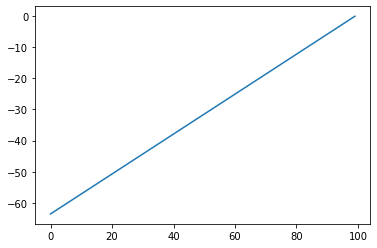

In [92]:
plt.plot(y2, x2)

In [102]:
play_audio(PLAYBACK_RECORDING_FILENAME, target_vol)

Playing on current volume of 17.999999225139618
Done
Resetting the volume to 37.5
Playing...
Done
